# Gerando um grafo não-orientado a partir da Triangulação de Delaunay

#### Carlos Eduardo Cassimiro da Silva

Uma das visualizações que pretendemos fazer no trabalho final da disciplina é de uma rede os municípios apontam para o seu vizinho com maior número de cvli. Para isso, precisamos construir um grafo não-orientado entre os municípios. Podemos fazer isso utilizando a Triangulação de Delaunay, pois a partir dos tiangulos criados, poderemos adentificar os municipios vizinhos pelos outros pontos de cada triângulo. O algoritmo gerará vários triângulos, mas podemos filtrar somente os pontos vizinhos sem repeti-los e criar um gráfo não-orientado.

Links que me ajudaram: <br>
https://stackoverflow.com/questions/64614478/create-triangular-mesh-from-vertex-coordinates <br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Delaunay.html

##### Módulos utilizados

In [1]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import pandas as pd
import json

# 1. Exemplo

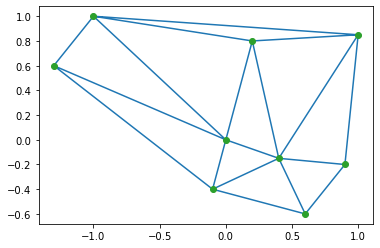

In [2]:
points = np.array([[-1,1],[-1.3, .6],[0,0],[.2,.8],[1,.85],[-.1,-.4],[.4,-.15],[.6,-.6],[.9,-.2]])
tri = Delaunay(points)

plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [3]:
tri.points

array([[-1.  ,  1.  ],
       [-1.3 ,  0.6 ],
       [ 0.  ,  0.  ],
       [ 0.2 ,  0.8 ],
       [ 1.  ,  0.85],
       [-0.1 , -0.4 ],
       [ 0.4 , -0.15],
       [ 0.6 , -0.6 ],
       [ 0.9 , -0.2 ]])

# 2. Triangulação do municipios do Ceará

Podemos aproveitar a estrutura do grafo para adicionar também os outros dados que precisaremos para as plotagens, então convém buscar os outros dados.

In [4]:
municipios = pd.read_csv('Visu/arquivos/ideb_municipios.csv')

In [5]:
cvli = pd.read_csv('Visu/arquivos/cvli_fortaleza_2019_att.csv', encoding='ISO-8859-1')

In [6]:
municipios.head()

,codigo_ibge,nome,latitude,longitude,UF,COD_MUNIC,NOTA_IDEB
0,2300101.0,ABAIARA,-7.34588,-39.0416,CE,2300101.0,6.1
1,2300150.0,ACARAPE,-4.22083,-38.7055,CE,2300150.0,5.4
2,2300200.0,ACARAU,-2.88769,-40.1183,CE,2300200.0,6.5
3,2300309.0,ACOPIARA,-6.08911,-39.4480,CE,2300309.0,6.0
4,2300408.0,AIUABA,-6.57122,-40.1178,CE,2300408.0,6.8


In [7]:
cvli.head()

,MUNICIPIO,QTD_CVLI
0,ABAIARA,0
1,ACARAPE,6
2,ACARAU,8
3,ACOPIARA,14
4,AIUABA,1


In [8]:
municipios['longitude']

0     -39.0416
1     -38.7055
2     -40.1183
3     -39.4480
4     -40.1178
        ...   
179   -39.5107
180   -40.5628
181   -40.4741
182   -39.2942
183   -41.0916
Name: longitude, Length: 184, dtype: float64

In [9]:
# Separando os dados de longitude e latitude que vai servir como coordenadas x e y dos pontos
pontos = [] 
for i,j in zip(municipios['latitude'].iteritems(), municipios['longitude'].iteritems()):
    pontos.append([i[1], j[1]]) # i[1] porque em i[0] há o index

In [10]:
# Tranformandoa lista em em um numpy array
pontos = np.array(pontos)

In [11]:
# Computando os triângulos
mesh = Delaunay(pontos)

In [12]:
# Verificando o tipo do objeto retornado
type(mesh)

scipy.spatial.qhull.Delaunay

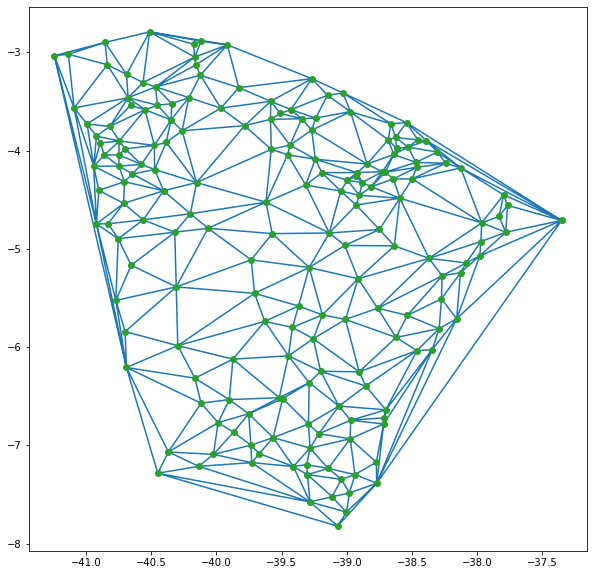

In [14]:
# Verificando como ficaram os triângulos
plt.figure(figsize=(10,10))
plt.triplot(pontos[:,1], pontos[:,0], mesh.simplices)
plt.plot(pontos[:,1], pontos[:,0], 'o')
plt.show()

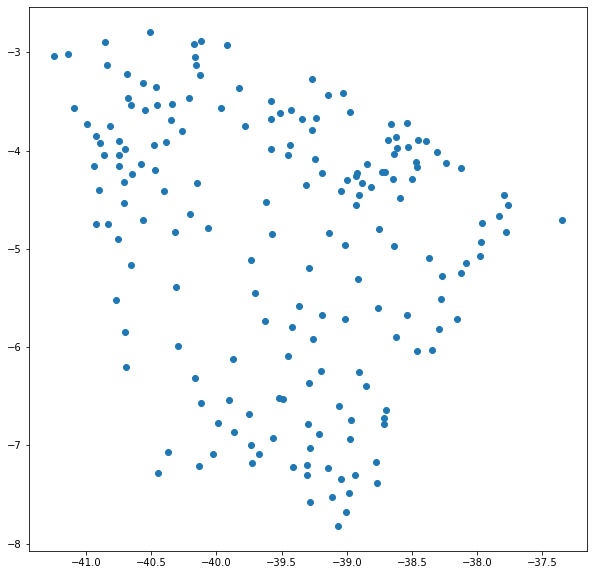

In [54]:
# Plotando somente os pontos para verificar se o contorno do anterior está certo
plt.figure(figsize=(10,10))
plt.scatter(y=municipios['latitude'], x=municipios['longitude'])

In [16]:
municipios['nome'][106]

'MARTINOPOLE'

In [17]:
# Verificando os vizinhos de MARTINOPOLE. Verifiquei dando um CTRL F na mágina e contando o número de triângulos
# em que o município aparecia
for i in mesh.simplices:
    print(i)

[ 96 108 137]
[108  79  54]
[106  31  97]
[106  63  31]
[183 143  45]
[143 134  45]
[11 58 74]
[108 146  74]
[146 108  54]
[133 132 161]
[ 25 183  45]
[183  25  63]
[31 25 45]
[63 25 31]
[183  39 143]
[171  77 136]
[156  95 137]
[ 95  96 137]
[ 96  30 108]
[ 24  79 108]
[132  43 161]
[ 58  43 132]
[130 124  47]
[146 151  74]
[151 146 168]
[130 116 124]
[148  21 150]
[133 174 132]
[48  5 60]
[180 106  97]
[ 77  29 136]
[ 29 150 136]
[143  51  81]
[ 39  51 143]
[147 171 134]
[171 147  77]
[ 30 144   0]
[ 95 144  96]
[144  30  96]
[ 23 124  13]
[124  23  47]
[151  94  74]
[ 73 116  21]
[ 73 148  71]
[148  73  21]
[124  73  71]
[116  73 124]
[101 151 168]
[124  34  13]
[ 48 117   5]
[117 180 165]
[180 117 106]
[106 117  63]
[117 183  63]
[117  48  60]
[80 69 81]
[51 80 81]
[80 39 67]
[80 51 39]
[ 49 169  77]
[ 78 169  49]
[142  80  67]
[ 80 142  69]
[ 69 181 157]
[181  65 157]
[142 181  69]
[ 46 148 150]
[148  46  71]
[ 39 160  67]
[ 72 160  39]
[176  72  39]
[134  32 156]
[  9 155 170]
[2

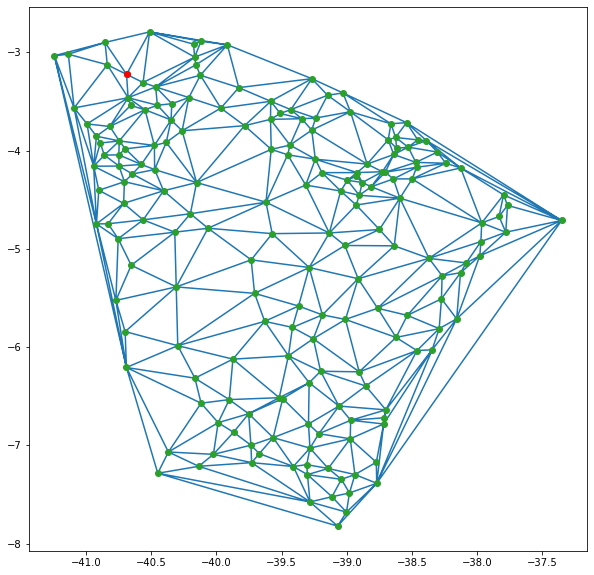

In [15]:
# Em seguida, contei o número de triângulo no mapa para conferir
plt.figure(figsize=(10,10))
plt.triplot(pontos[:,1], pontos[:,0], mesh.simplices)
plt.plot(pontos[:,1], pontos[:,0], 'o')
plt.plot(municipios['longitude'][106],municipios['latitude'][106],'o',c='r')
plt.show()

In [18]:
simplices_list = mesh.simplices

In [ ]:
# Exemplo de como queremos a estrutura
#network = {'municipio_1':{ 'vizinhos': ['municipio_2','municipio_3'], 
#                           'crimes':12}, 
#           'municipio_2':{ 'vizinhos': ['municipio_3','municipio_4'], 
#                           'crimes':15}}

In [53]:
network = {}           # dicionario da estrutura do grafo
for i in simplices_list:           # Percorre cada triângulo
    for j in i:           # Percorre cada elemento do triângulo
        if municipios['nome'][j] not in network.keys(): # Verifica se já foi adicionado, pois o mesmo municipio se repetirá em mais de um triângulo
            network[municipios['nome'][j]] = {'nota_ideb':int(municipios['NOTA_IDEB'][j]), # Caso não esteja, vai criar um elemento no dicionário 
                                              'qtd_cvli': int(cvli['QTD_CVLI'][j]), # como nome do municpio como chave com os referido dados
                                              'vizinhos':[], # Os vizinhos serão adicionados em seguida
                                              'latitude':float(municipios['latitude'][j]),
                                              'longitude':float(municipios['longitude'][j])}
        for k in i: # Percorre cada elemento do triângulo
            if (k!=j) and (municipios['nome'][k] not in network[municipios['nome'][j]]['vizinhos']): # Verifica se o elemento não é o que foi adicionado, para nao adicionar 
                network[municipios['nome'][j]]['vizinhos'].append(municipios['nome'][k]) # ele mesmo aos vizinhos  e os outros elementos já foram adicioandos aos vizinhos

In [54]:
# Como ficou
network

{'JATI': {'nota_ideb': 5,
  'qtd_cvli': 1,
  'vizinhos': ['MAURITI', 'PENAFORTE', 'JARDIM', 'BREJO SANTO', 'PORTEIRAS'],
  'latitude': -7.6797,
  'longitude': -39.0029},
 'MAURITI': {'nota_ideb': 5,
  'qtd_cvli': 9,
  'vizinhos': ['JATI',
   'PENAFORTE',
   'IPAUMIRIM',
   'ERERE',
   'POTIRETAMA',
   'ICAPUI',
   'BREJO SANTO',
   'BARRO',
   'MILAGRES'],
  'latitude': -7.38597,
  'longitude': -38.7708},
 'PENAFORTE': {'nota_ideb': 6,
  'qtd_cvli': 2,
  'vizinhos': ['JATI', 'MAURITI', 'SALITRE', 'JARDIM'],
  'latitude': -7.82163,
  'longitude': -39.0707},
 'IPAUMIRIM': {'nota_ideb': 5,
  'qtd_cvli': 0,
  'vizinhos': ['MAURITI',
   'ERERE',
   'BARRO',
   'AURORA',
   'LAVRAS DA MANGABEIRA',
   'UMARI',
   'BAIXIO'],
  'latitude': -6.78265,
  'longitude': -38.7179},
 'ERERE': {'nota_ideb': 6,
  'qtd_cvli': 1,
  'vizinhos': ['MAURITI',
   'IPAUMIRIM',
   'POTIRETAMA',
   'IRACEMA',
   'PEREIRO',
   'UMARI'],
  'latitude': -6.02751,
  'longitude': -38.3461},
 'MARTINOPOLE': {'nota_ideb':

In [55]:
JSON em um arquivo
with open('Visu/arquivos/grafo.json', 'w') as outfile: # Salvando os dados em formato 
    json.dump(network, outfile)